In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [4]:
df = pd.read_excel("./data/iris_xlsx.xlsx")
df.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [7]:
X = df.iloc[:,:-1]
X.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [14]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
centroids = pd.DataFrame(kmeans.cluster_centers_,
                        columns=X.columns)
centroids

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


In [16]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [17]:
df["cluster"] = kmeans.labels_
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [18]:
pd.crosstab(df["Species"], df["cluster"])

cluster,0,1,2
Species,,,
setosa,50,0,0
versicolor,0,48,2
virginica,0,14,36


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

In [21]:
df= pd.read_excel("./data/iris_xlsx.xlsx")
X = df.drop("Species", axis = 1)
linked = linkage(X, "ward") # 거리계산

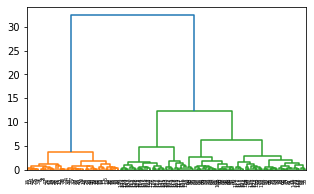

In [22]:
plt.figure(figsize=(5,3))
dendrogram(linked)
plt.show()

In [25]:
df["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
cluster = AgglomerativeClustering(n_clusters=3,
                                 affinity="euclidean",
                                 linkage="ward")

In [27]:
cluster

AgglomerativeClustering(n_clusters=3)

In [28]:
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)